In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time



 Time taken to calculate mandelbrot set is:  50.5244665145874  seconds.


 Time taken to make image is:  0.22374606132507324  seconds.




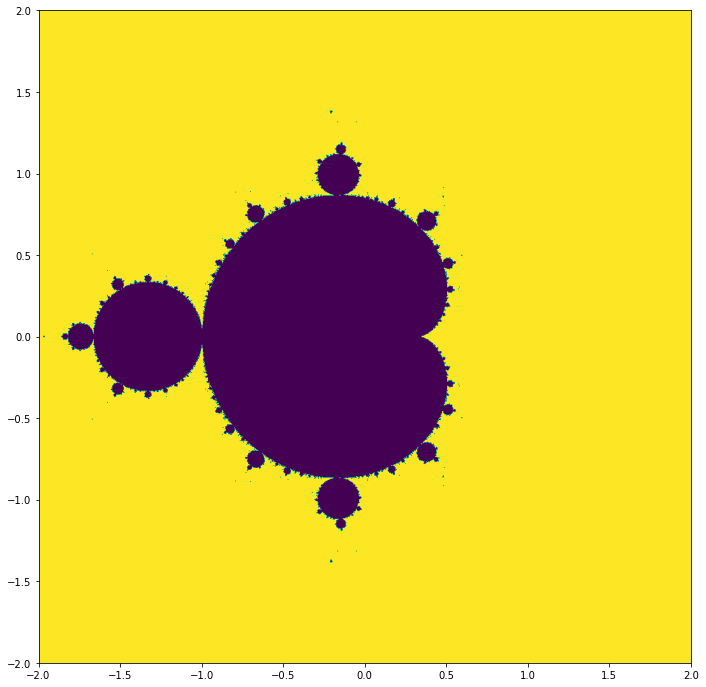

In [54]:
def mandelbrotset_test(lower_limit, upper_limit,dimension, max_iteration,  convergence_radius):

    ''' 
    This function will first create a grid of complex numbers. These complex numbers will be tested if they belong to mandelbrot set using ElementwiseKernel defined above.Those
    complex numbers that belong to the set are changed to value 1 else 0. Returns us a mandelbrot set.
    '''

    x = np.linspace(lower_limit,upper_limit, dimension, dtype=np.float32)
    y = np.linspace(lower_limit, upper_limit, dimension, dtype=np.float32)
    X,Y = np.meshgrid(x, 1j*y)
    Z = X + Y
    
    empty_mandelbrot_set = np.zeros(dimension*dimension)
    Z_raveled = np.ravel(Z)

    for k in np.arange(len(Z_raveled)):
        c = Z_raveled[k]
        z = 0

        for n in np.arange(max_iteration):
            z = z**2 + c
            
            if abs(z) > convergence_radius:
                empty_mandelbrot_set[k] = 1
                break
                
    mandelbrot_set = empty_mandelbrot_set.reshape(dimension, dimension)  
    return mandelbrot_set

def graph_mandelbrotset(mandel_set):
    
    ''' Uses mandelbrot set to make a fractal graph.'''
    
    plt.figure(figsize=(12,12))
    plt.imshow(mandel_set, extent=(-2.0, 2.0, -2.0, 2.0))


def main():
    time1 = time()
    result1 = mandelbrotset_test(-1.5, 1.5,1024,300, 2)
    time2 = time()
    print("\n\n Time taken to calculate mandelbrot set is: ", time2 - time1, " seconds.")

    t1 = time()
    result2 = graph_mandelbrotset(result1)
    t2 = time()
    print("\n\n Time taken to make image is: ", t2 - t1, " seconds.\n\n")

if __name__ == "__main__":
    main()

<font color = 'magenta'>We can run the code below to run a profiler that will calculate time taken by each function. This will help us to understand/identify where the most time is spent. By identifying the most time consuming parts in the code we can then work on to make it efficient by optimizing that part of the code which is very time consuming.</font> 

`%prun -s cumulative main()`